In [6]:
import numpy as np
from matplotlib import pyplot as pl
import pandas as pd

# Punto 1
### FastICA

In [7]:
def blanqueo(x):
    # Calculate the covariance matrix
    coVarM = np.cov(x)

    # Single value decoposition
    U, S, V = np.linalg.svd(coVarM)

    # Calculate diagonal matrix of eigenvalues
    d = np.diag(1.0 / np.sqrt(S))

    # Calculate whitening matrix
    whiteM = np.dot(U, np.dot(d, U.T))

    # Project onto whitening matrix
    Xw = np.dot(whiteM, x)

    return Xw, whiteM

In [8]:

def fastICA(signals,  alpha = 1, thresh=1e-8, iterations=5000):
    m, n = signals.shape

    # Initialize random weights
    W = np.random.rand(n,m)

    for c in range(n):
            w = W[c, :].copy().reshape(m, 1)
            w = w / np.sqrt((w ** 2).sum())
            #w = w / np.linalg.norm(w)

            i = 0
            lim = 100
            while ((lim > thresh) & (i < iterations) & ~np.isnan(w.sum())):

                # Dot product of weight and signal
                #ws = np.dot(w.T, signals)
                ws = w.T@signals

                # Pass w*s into contrast function g
                wg = np.tanh(ws * alpha).T

                # Pass w*s into g prime
                wg_ = (1 - np.square(np.tanh(alpha*ws))) * alpha

                # Update weights
                wNew = -(signals * wg.T).mean(axis=1) + (wg_.mean() * w.squeeze())
                #print(w[::-1][0].squeeze())
                #wNew = -(signals * wg.T).mean(axis=1) + (wg_.mean() * w[::-1][0].squeeze())
                
                #wNew = wNew / np.sqrt(np.square(wNew).sum())
                #wNew = wNew / np.linalg.norm(wNew)

                # Decorrelate weights              
                wNew = wNew - np.dot(np.dot(wNew, W[:c].T), W[:c])
                wNew = wNew / np.sqrt(np.square(wNew).sum())
                #wNew = wNew / np.linalg.norm(wNew)

                # Calculate limit condition
                lim = np.abs(np.abs((wNew * w).sum()) - 1)

                # Update weights
                w = wNew

                # Update counter
                i += 1

            W[c, :] = w.T
    return W


## Punto 2

In [31]:
# Genero señales y matriz de mezcla

s1 = np.random.rand(2,1000)
s2 = np.random.laplace(loc=0,scale=1,size=(2,100))

m_mezcla = np.random.rand(2,2)

s1_m = m_mezcla@(s1-s1.mean())
s2_m = m_mezcla@(s2-s2.mean())

x_blanca1, m_blanca1 = blanqueo(s1_m)
x_blanca2, m_blanca2 = blanqueo(s2_m)

W1 = (fastICA(x_blanca1)@x_blanca1)[0:2]
W2 = (fastICA(x_blanca2)@x_blanca2)[0:2]

x1 = W1 - s1_m.mean()

x2 = W2 - s2_m.mean()


<ipython-input-8-2b3f33dc6889>:36: RuntimeWarning: invalid value encountered in true_divide
  wNew = wNew / np.sqrt(np.square(wNew).sum())


In [32]:
print('W1 es: {}'.format(W1))
print('La inversa de la matriz A es: {}'.format(np.linalg.inv(m_mezcla)))
print('W2 es: {}'.format(W2))

W1 es: [[-1.5756406  -1.43891036 -0.56517669 ...  0.0068419  -0.71802231
  -1.65893764]
 [ 1.15763764  1.0654604  -0.33922321 ...  1.61648637  0.10255731
  -1.43037505]]
La inversa de la matriz A es: [[-5.02094612  7.52758401]
 [ 4.15001917 -4.53704706]]
W2 es: [[ 0.02882799 -0.10086087  1.84492761  0.18337028 -0.20126804 -0.70344396
   0.17419717  0.21962667  2.16081683  0.5748657  -0.13927652  0.75053834
  -0.23682371  4.1275638  -0.89996369 -0.20211349  0.04924335  1.47124749
   0.4438194  -0.53873366 -0.26060718  1.40856488  0.14959698 -0.11049638
  -0.44424272 -0.78548989  2.58437829  0.66119047  0.4840419  -0.92075828
  -0.41805278  0.06001461 -0.8057832  -0.48378708  0.3058829  -0.00723261
  -0.6688083   0.78416139 -1.78545582 -1.40880456 -0.71590599  0.13072337
  -0.50469968 -2.39170757  0.18433085  0.06545741 -1.07277406  0.59652483
  -0.76546857 -2.16757702  2.03621514  0.74740679  1.32926684 -1.11665835
   0.34574434 -0.40598253  0.66475854  2.83711192 -0.53393085  0.2119542

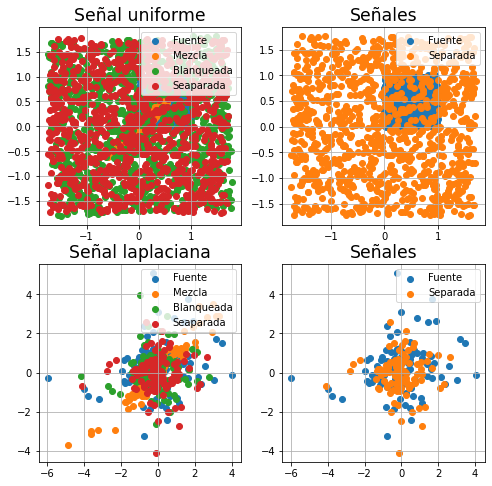

In [25]:
fig, ax = pl.subplots(2,2, figsize=[8,8])

g_s = ax[0][0].scatter(s1[0],s1[1])
g_s_m = ax[0][0].scatter(s1_m[0],s1_m[1])
g_x = ax[0][0].scatter(x_blanca1[0],x_blanca1[1])
g_x_ica = ax[0][0].scatter(x1[0],x1[1])
ax[0][0].grid()
ax[0][0].legend((g_s,g_s_m,g_x,g_x_ica),('Fuente','Mezcla','Blanqueada','Seaparada'), loc='upper right')
ax[0][0].set_title("Señal uniforme",fontsize='xx-large');

#ax.legend((l2, l4), ('oscillatory', 'damped'), loc='upper right', shadow=True)

g_s = ax[0][1].scatter(s1[0],s1[1])
g_x_ica = ax[0][1].scatter(x1[0],x1[1])

ax[0][1].grid()
ax[0][1].legend((g_s,g_x_ica),('Fuente','Separada'), loc='upper right')
ax[0][1].set_title("Señales",fontsize='xx-large');




g_s = ax[1][0].scatter(s2[0],s2[1])
g_s_m = ax[1][0].scatter(s2_m[0],s2_m[1])
g_x = ax[1][0].scatter(x_blanca2[0],x_blanca2[1])
g_x_ica = ax[1][0].scatter(x2[0],x2[1])
ax[1][0].grid()
ax[1][0].legend((g_s,g_s_m,g_x,g_x_ica),('Fuente','Mezcla','Blanqueada','Seaparada'), loc='upper right')
ax[1][0].set_title("Señal laplaciana",fontsize='xx-large');

#ax.legend((l2, l4), ('oscillatory', 'damped'), loc='upper right', shadow=True)

g_s = ax[1][1].scatter(s2[0],s2[1])
g_x_ica = ax[1][1].scatter(x2[0],x2[1])

ax[1][1].grid()
ax[1][1].legend((g_s,g_x_ica),('Fuente','Separada'), loc='upper right')
ax[1][1].set_title("Señales",fontsize='xx-large');


In [26]:
# Genero señales y matriz de mezcla

s1 = np.random.rand(2,1000)
s2 = np.random.laplace(loc=0,scale=1,size=(2,100)) 

m_mezcla = np.random.rand(2,2)

s1_m = m_mezcla@(s1-s1.mean()) + np.random.randn(2,1000)
s2_m = m_mezcla@(s2-s2.mean()) + np.random.randn(2,100)

x_blanca1, m_blanca1 = blanqueo(s1_m)
x_blanca2, m_blanca2 = blanqueo(s2_m)

W1 = (fastICA(x_blanca1)@x_blanca1)[0:2]
W2 = (fastICA(x_blanca2)@x_blanca2)[0:2]

x1 = W1 - s1_m.mean()

x2 = W2 - s2_m.mean()

<ipython-input-8-2b3f33dc6889>:36: RuntimeWarning: invalid value encountered in true_divide
  wNew = wNew / np.sqrt(np.square(wNew).sum())


In [27]:
fig, ax = pl.subplots(2,2, figsize=[8,8])

g_s = ax[0][0].scatter(s1[0],s1[1])
g_s_m = ax[0][0].scatter(s1_m[0],s1_m[1])
g_x = ax[0][0].scatter(x_blanca1[0],x_blanca1[1])
g_x_ica = ax[0][0].scatter(x1[0],x1[1])
ax[0][0].grid()
ax[0][0].legend((g_s,g_s_m,g_x,g_x_ica),('Fuente','Mezcla','Blanqueada','Seaparada'), loc='upper right')
ax[0][0].set_title("Señal uniforme",fontsize='xx-large');

#ax.legend((l2, l4), ('oscillatory', 'damped'), loc='upper right', shadow=True)

g_s = ax[0][1].scatter(s1[0],s1[1])
g_x_ica = ax[0][1].scatter(x1[0],x1[1])

ax[0][1].grid()
ax[0][1].legend((g_s,g_x_ica),('Fuente','Separada'), loc='upper right')
ax[0][1].set_title("Señales",fontsize='xx-large');




g_s = ax[1][0].scatter(s2[0],s2[1])
g_s_m = ax[1][0].scatter(s2_m[0],s2_m[1])
g_x = ax[1][0].scatter(x_blanca2[0],x_blanca2[1])
g_x_ica = ax[1][0].scatter(x2[0],x2[1])
ax[1][0].grid()
ax[1][0].legend((g_s,g_s_m,g_x,g_x_ica),('Fuente','Mezcla','Blanqueada','Seaparada'), loc='upper right')
ax[1][0].set_title("Señal laplaciana",fontsize='xx-large');

#ax.legend((l2, l4), ('oscillatory', 'damped'), loc='upper right', shadow=True)

g_s = ax[1][1].scatter(s2[0],s2[1])
g_x_ica = ax[1][1].scatter(x2[0],x2[1])

ax[1][1].grid()
ax[1][1].legend((g_s,g_x_ica),('Fuente','Separada'), loc='upper right')
ax[1][1].set_title("Señales",fontsize='xx-large');

In [28]:
# Genero señales y matriz de mezcla

s1 = np.array(np.squeeze([np.random.rand(1,1000), np.random.randn(1,1000)]))
s2 = np.array(np.squeeze([np.random.laplace(loc=0,scale=1,size=(1,100)), np.random.randn(1,100)]))

#s2 = np.random.laplace(loc=0,scale=1,size=(2,100)) + np.random.randn(2,100)

m_mezcla = np.random.rand(2,2)

s1_m = m_mezcla@(s1-s1.mean())
s2_m = m_mezcla@(s2-s2.mean())

x_blanca1, m_blanca1 = blanqueo(s1_m)
x_blanca2, m_blanca2 = blanqueo(s2_m)

W1 = (fastICA(x_blanca1)@x_blanca1)[0:2]
W2 = (fastICA(x_blanca2)@x_blanca2)[0:2]

x1 = W1 - s1_m.mean()

x2 = W2 - s2_m.mean()

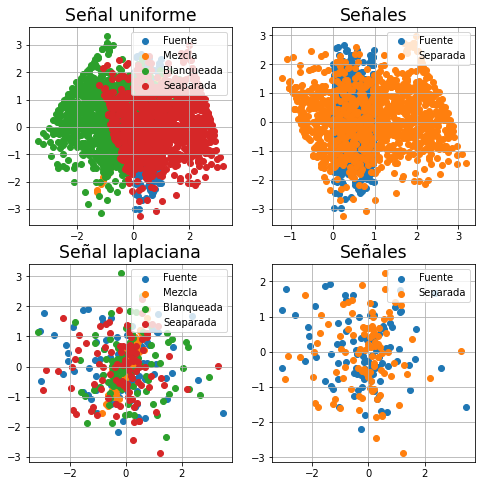

In [29]:
fig, ax = pl.subplots(2,2, figsize=[8,8])

g_s = ax[0][0].scatter(s1[0],s1[1])
g_s_m = ax[0][0].scatter(s1_m[0],s1_m[1])
g_x = ax[0][0].scatter(x_blanca1[0],x_blanca1[1])
g_x_ica = ax[0][0].scatter(x1[0],x1[1])
ax[0][0].grid()
ax[0][0].legend((g_s,g_s_m,g_x,g_x_ica),('Fuente','Mezcla','Blanqueada','Seaparada'), loc='upper right')
ax[0][0].set_title("Señal uniforme",fontsize='xx-large');

#ax.legend((l2, l4), ('oscillatory', 'damped'), loc='upper right', shadow=True)

g_s = ax[0][1].scatter(s1[0],s1[1])
g_x_ica = ax[0][1].scatter(x1[0],x1[1])

ax[0][1].grid()
ax[0][1].legend((g_s,g_x_ica),('Fuente','Separada'), loc='upper right')
ax[0][1].set_title("Señales",fontsize='xx-large');




g_s = ax[1][0].scatter(s2[0],s2[1])
g_s_m = ax[1][0].scatter(s2_m[0],s2_m[1])
g_x = ax[1][0].scatter(x_blanca2[0],x_blanca2[1])
g_x_ica = ax[1][0].scatter(x2[0],x2[1])
ax[1][0].grid()
ax[1][0].legend((g_s,g_s_m,g_x,g_x_ica),('Fuente','Mezcla','Blanqueada','Seaparada'), loc='upper right')
ax[1][0].set_title("Señal laplaciana",fontsize='xx-large');

#ax.legend((l2, l4), ('oscillatory', 'damped'), loc='upper right', shadow=True)

g_s = ax[1][1].scatter(s2[0],s2[1])
g_x_ica = ax[1][1].scatter(x2[0],x2[1])

ax[1][1].grid()
ax[1][1].legend((g_s,g_x_ica),('Fuente','Separada'), loc='upper right')
ax[1][1].set_title("Señales",fontsize='xx-large');